In [1]:
import os
import pandas as pd
import numpy as np
import sys
import os

def find_and_append_module_path():
    current_dir = os.getcwd()
    substring_to_find = 'statsfaction'
    index = current_dir.rfind(substring_to_find)
    
    if index != -1:
        # Extract the directory path up to and including the last "mypath" occurrence
        new_dir = current_dir[:index + (len(substring_to_find))]

        # Change the current working directory to the new directory
        os.chdir(new_dir)
        sys.path.append(new_dir)
        # Verify the new current directory
        print("New current directory:", os.getcwd())
    else:
        print("No 'mypath' found in the current directory")

find_and_append_module_path()
os.getcwd()


New current directory: c:\Users\Robert\Documents\Projekte\dev\statsfaction


'c:\\Users\\Robert\\Documents\\Projekte\\dev\\statsfaction'

In [2]:
from src.sport_analytics.model.predict import predict_and_explain_players, analyze_individual_ID
from src.sport_analytics.model.eval import create_polar_plot

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Import your group to analyze

In [3]:
sql_prospect = f"""
SELECT min(Age) as potential_age,* FROM  fifa WHERE  FIFA = 2024 and Age < 23 and potential > 65 and overall <84
GROUP BY ID
order by potential DESC;
"""


import pandas as pd
import sqlite3
DATABASE_PATH = "data/sport_analytics/database/football.db"
# Step 1: Establish a database connection
conn = sqlite3.connect(DATABASE_PATH)

df_prospect = pd.read_sql_query(sql_prospect, conn)

conn.close()

df_prospect.head()

,potential_age,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,FIFA,Composure,Defensive awareness
0,19.0,263578,Balde,19.0,https://cdn.sofifa.net/players/263/578/24_60.png,Spain,https://cdn.sofifa.net/flags/es.png,81.0,89.0,FC Barcelona,...,80.0,79.0,5.0,8.0,7.0,10.0,13.0,2024,64.0,72.0
1,20.0,259399,R. Højlund,20.0,https://cdn.sofifa.net/players/259/399/24_60.png,Denmark,https://cdn.sofifa.net/flags/dk.png,76.0,89.0,Manchester United,...,24.0,15.0,12.0,8.0,9.0,14.0,7.0,2024,72.0,27.0
2,21.0,258729,Gabri Veiga,21.0,https://cdn.sofifa.net/players/258/729/24_60.png,Spain,https://cdn.sofifa.net/flags/es.png,78.0,89.0,Celta de Vigo,...,73.0,60.0,13.0,14.0,13.0,6.0,9.0,2024,68.0,41.0
3,20.0,248243,E. Camavinga,20.0,https://cdn.sofifa.net/players/248/243/24_60.png,France,https://cdn.sofifa.net/flags/fr.png,82.0,89.0,Real Madrid,...,80.0,79.0,12.0,6.0,8.0,12.0,12.0,2024,82.0,75.0
4,20.0,245367,X. Simons,20.0,https://cdn.sofifa.net/players/245/367/24_60.png,Netherlands,https://cdn.sofifa.net/flags/nl.png,79.0,89.0,RB Leipzig,...,62.0,56.0,9.0,11.0,5.0,8.0,10.0,2024,78.0,60.0


In [4]:
df_prospect = pd.concat([pd.DataFrame(pd.Series({'Position':"ST",'Reactions':58, 'Stamina':45, 'Positioning':56, 'FKAccuracy':65,
       'ShortPassing':54, 'Dribbling':62, 'BallControl':60, 'ShotPower':82, 'Aggression':78,"FIFA":2024,
       'Vision':57, 'SprintSpeed':89,"Age":17,"Name":"N.Irankunda","ID":266245})).T,df_prospect])

In [5]:
df_prospect = pd.concat([pd.DataFrame(pd.Series({'Position':"ST",'Reactions':75, 'Stamina':65, 'Positioning':70, 'FKAccuracy':65,
       'ShortPassing':65, 'Dribbling':62, 'BallControl':60, 'ShotPower':82, 'Aggression':78,"FIFA":2024,
       'Vision':57, 'SprintSpeed':89,"Age":17,"Name":"N.Irankunda","ID":101})).T,df_prospect])

In [6]:
pd.Series(df_prospect.Overall/(df_prospect.Age**2)).describe()

count     3866.000000
unique     172.000000
top          0.130165
freq        87.000000
dtype: float64

## Choose a from a Set of trained models

In [7]:
import pickle

with open("./data/sport_analytics/model/Offense_trained_models.pkl", "rb") as file:
    loaded_object = pickle.load(file)

In [8]:
[i for i in loaded_object]

['Decision Tree Classifier',
 'Random Forest Classifier',
 'XGBoost Classifier general',
 'XGBoost Classifier',
 'LightGBM Classifier']

In [9]:
chosen_object = loaded_object[ 'XGBoost Classifier general']
model = chosen_object['Model']
scaler = chosen_object['Scaler']
attributes = chosen_object['attributes']

print(chosen_object['Classification Report'])
print(chosen_object['AUC'])

              precision    recall  f1-score   support

       False       0.89      0.78      0.83        51
        True       0.21      0.38      0.27         8

    accuracy                           0.73        59
   macro avg       0.55      0.58      0.55        59
weighted avg       0.80      0.73      0.76        59

0.7156862745098039


# Predict entire Dataset

[15:50:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


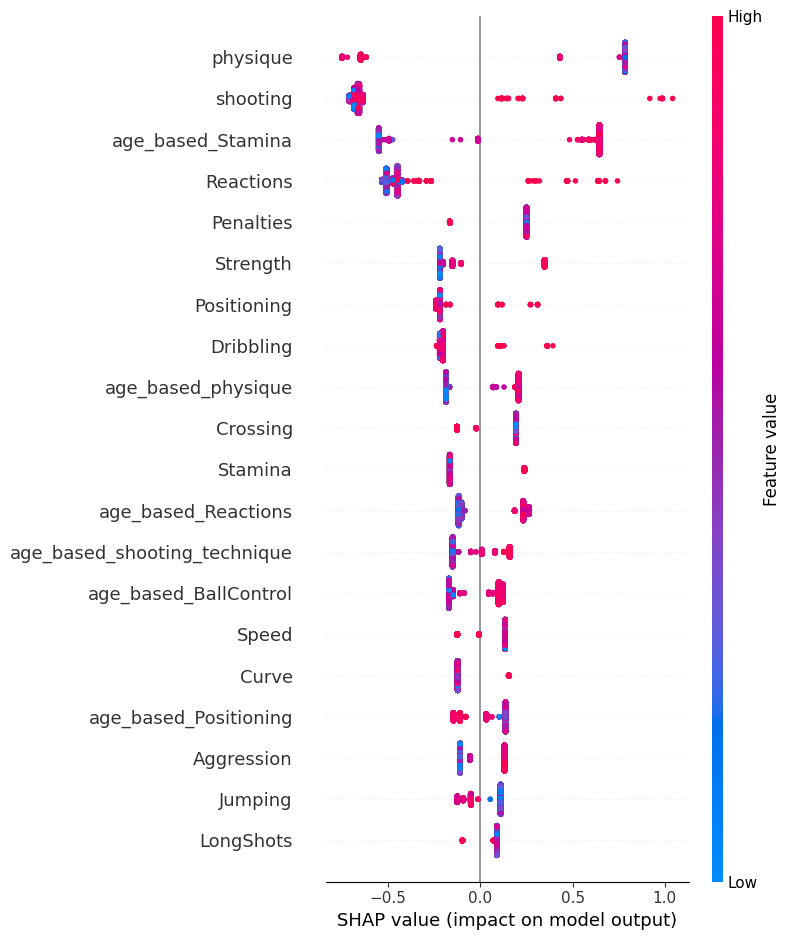

,,,Crossing,Finishing,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,SprintSpeed,...,age_based_Reactions,age_based_physique,age_based_shooting_technique,age_based_Stamina,age_based_Positioning,age_based_Vision,age_based_Finishing,age_based_BallControl,summe_shap,prediction
ID,Name,FIFA,,,,,,,,,,,,,,,,,,,,,
275698,V. Arsić,2024,0.377,0.126,-0.233,0.0,-0.296,-0.167,0.045,0.0,0.181,-0.078,...,-0.808,1.047,-0.734,-1.126,0.800,0.851,0.0,-1.114,-1.618000,0.080352
270348,J. Manev,2024,0.377,0.126,-0.233,0.0,-0.296,-0.167,0.045,0.0,0.181,-0.078,...,-0.808,1.047,-0.734,-1.126,0.800,0.851,0.0,-1.114,-1.618000,0.080352
269633,Dani González,2024,0.377,0.126,-0.233,0.0,-0.296,-0.167,-0.352,0.0,0.181,-0.078,...,-0.808,-0.972,-0.734,-1.126,-1.268,0.851,0.0,-1.114,-8.660000,0.080157
276855,Raúl Sáenz,2024,0.377,0.126,-0.233,0.0,-0.296,-0.167,-0.352,0.0,0.181,-0.078,...,-0.808,-0.972,0.483,-1.126,-1.568,0.851,0.0,-1.114,-9.417000,0.079697
264537,M. Villarroel,2024,0.377,0.126,-0.233,0.0,-0.296,-0.167,-0.352,0.0,0.181,-0.078,...,-0.808,-0.972,0.483,-1.126,-1.568,-1.175,0.0,-1.114,-9.573000,0.079383
271005,N. Prelec,2024,0.377,0.126,-0.233,0.0,-0.296,-0.167,0.045,0.0,0.181,-0.078,...,-0.721,1.047,1.646,-1.126,-1.268,-1.175,0.0,1.038,-3.125000,0.078303
259712,M. Diaw,2024,0.377,0.126,-0.233,0.0,-0.296,-0.167,0.045,0.0,0.181,-0.078,...,-0.808,1.047,-0.734,-1.126,0.800,0.851,0.0,-1.114,-3.946000,0.077461
273121,Á. Orelien,2024,0.377,0.126,-0.233,0.0,-0.296,-0.167,-0.352,0.0,0.181,-0.078,...,-0.721,-0.972,-0.734,-1.126,-1.568,-1.175,0.0,1.038,-10.617001,0.077067
255435,D. Torres,2024,0.377,0.126,-0.233,0.0,-0.296,-0.167,-0.352,0.0,0.181,-0.078,...,-0.808,-0.972,-0.734,-1.126,0.800,-1.175,0.0,-1.114,-10.316001,0.077032


In [10]:
preds = predict_and_explain_players(df_prospect,attributes=attributes,model=model,scaler=scaler)
preds.tail(30)

# Analyze individual Players

In [11]:
df_prospect.head()

,Position,Reactions,Stamina,Positioning,FKAccuracy,ShortPassing,Dribbling,BallControl,ShotPower,Aggression,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Composure,Defensive awareness
0,ST,75,65,70,65,65,62,60,82,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,ST,58,45,56,65,54,62,60,82,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"LB,RB",78.0,75.0,63.0,28.0,80.0,77.0,80.0,53.0,47.0,...,NaN,80.0,79.0,5.0,8.0,7.0,10.0,13.0,64.0,72.0
1,ST,75.0,73.0,77.0,48.0,68.0,75.0,76.0,78.0,69.0,...,NaN,24.0,15.0,12.0,8.0,9.0,14.0,7.0,72.0,27.0
2,"CM,CAM",76.0,69.0,75.0,60.0,80.0,80.0,82.0,77.0,46.0,...,NaN,73.0,60.0,13.0,14.0,13.0,6.0,9.0,68.0,41.0


[15:50:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


pred 0.6405119
[(101, 'N.Irankunda', 2024)]


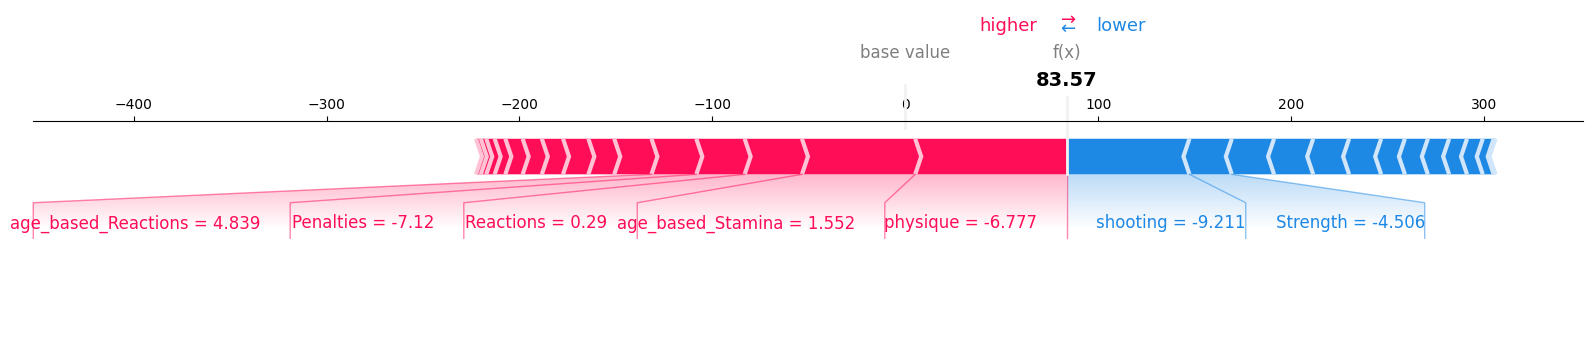

                             (101, N.Irankunda, 2024)       shap
Crossing                                          NaN  19.270000
Finishing                                         NaN   2.820000
ShortPassing                                       65  -5.650000
Volleys                                           NaN   0.000000
Dribbling                                          62 -20.280001
Curve                                             NaN -12.300000
FKAccuracy                                         65  -8.170000
LongPassing                                       NaN   0.000000
BallControl                                        60   4.360000
SprintSpeed                                        89  -0.930000
Agility                                           NaN   0.000000
Reactions                                          75  29.700001
Balance                                           NaN   0.000000
ShotPower                                          82   0.000000
Jumping                  

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


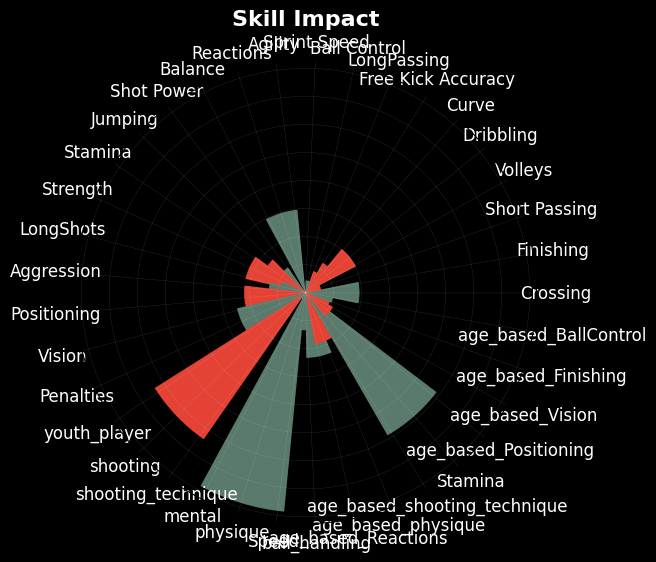

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred 0.1833631
[(266245, 'N.Irankunda', 2024)]


[15:50:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


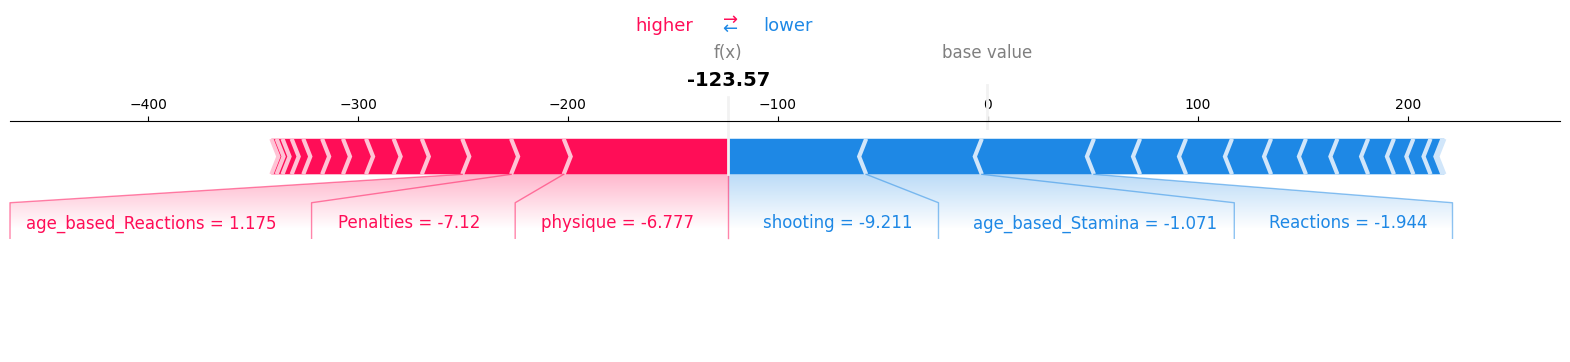

                             (266245, N.Irankunda, 2024)       shap
Crossing                                             NaN  19.270000
Finishing                                            NaN   2.820000
ShortPassing                                          54  -5.650000
Volleys                                              NaN   0.000000
Dribbling                                             62 -21.900000
Curve                                                NaN -12.300000
FKAccuracy                                            65  -8.170000
LongPassing                                          NaN   0.000000
BallControl                                           60   4.360000
SprintSpeed                                           89  -0.930000
Agility                                              NaN   0.000000
Reactions                                             58 -53.410000
Balance                                              NaN   0.000000
ShotPower                                       

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


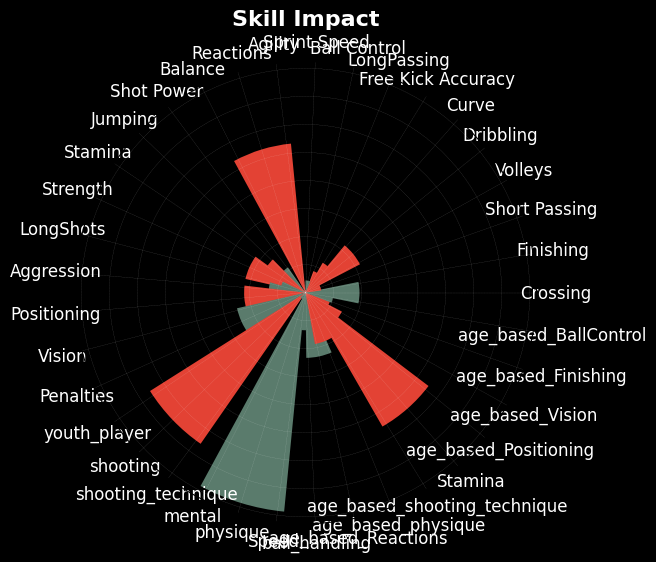

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred 0.7538475
[(240833, 'Y. Moukoko', 2024)]


[15:50:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


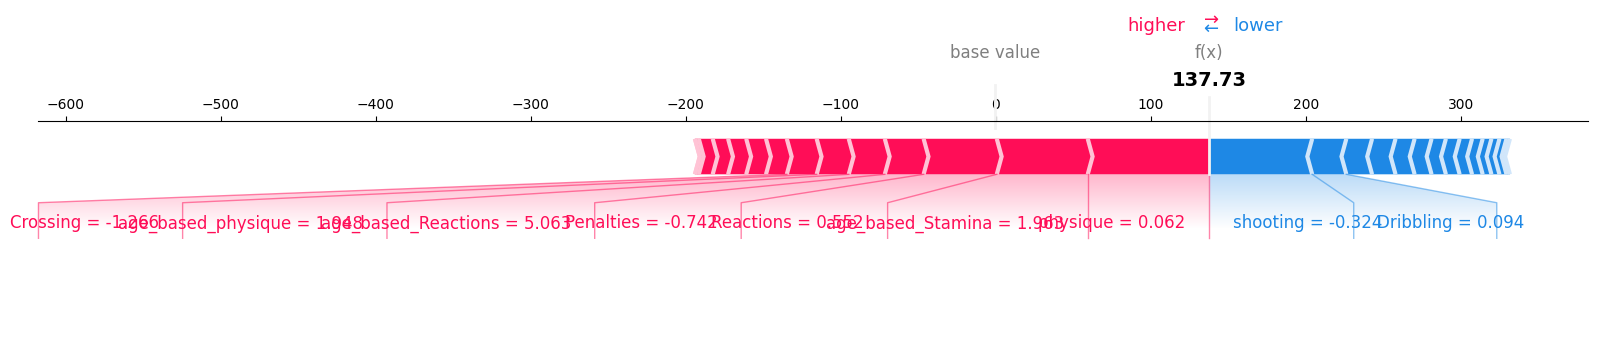

                             (240833, Y. Moukoko, 2024)       shap
Crossing                                           47.0  19.270000
Finishing                                          79.0  -2.220000
ShortPassing                                       71.0  -5.650000
Volleys                                            77.0   0.000000
Dribbling                                          79.0 -22.049999
Curve                                              68.0 -12.300000
FKAccuracy                                         42.0  -6.860000
LongPassing                                        48.0   0.000000
BallControl                                        81.0  -4.530000
SprintSpeed                                        79.0   0.020000
Agility                                            85.0   0.000000
Reactions                                          77.0  47.200001
Balance                                            86.0   0.000000
ShotPower                                          78.0   0.00

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


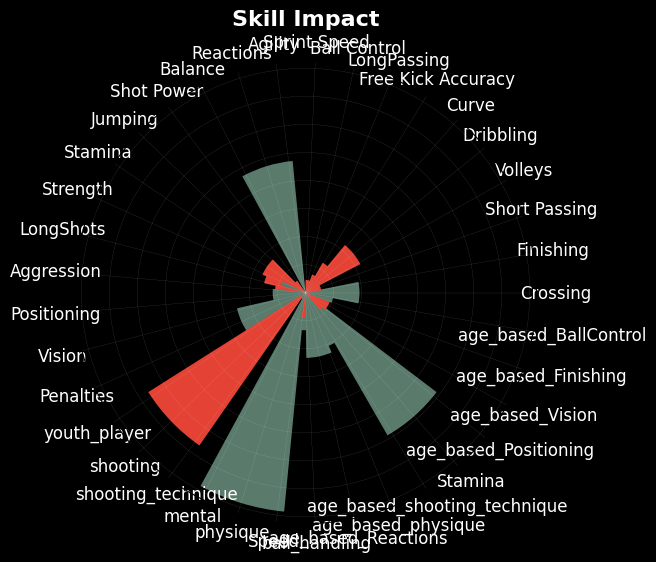

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred 0.4853897
[(251852, 'K. Adeyemi', 2024)]


[15:50:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


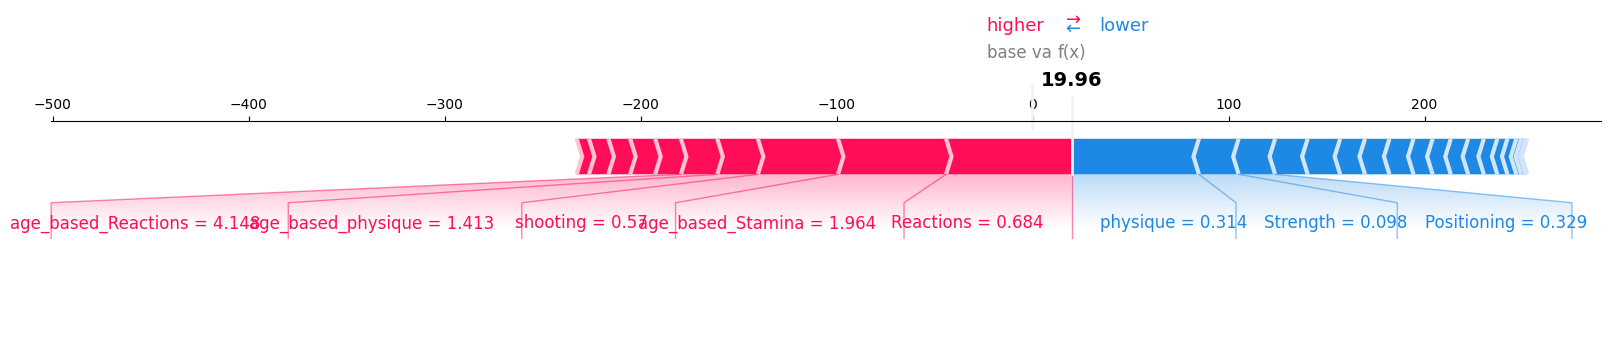

                             (251852, K. Adeyemi, 2024)       shap
Crossing                                           71.0 -12.660000
Finishing                                          80.0  -2.220000
ShortPassing                                       74.0   6.270000
Volleys                                            71.0   0.000000
Dribbling                                          82.0  11.100000
Curve                                              67.0 -12.300000
FKAccuracy                                         62.0  -6.860000
LongPassing                                        64.0   0.000000
BallControl                                        79.0  -4.530000
SprintSpeed                                        96.0  -0.930000
Agility                                            88.0   0.000000
Reactions                                          78.0  64.169998
Balance                                            81.0   0.000000
ShotPower                                          76.0   0.00

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


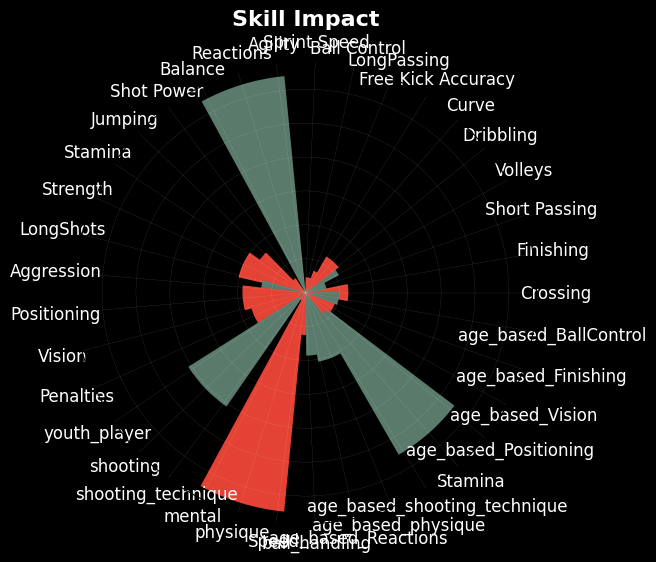

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################


[15:50:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


pred 0.18327028
[(256658, 'J. Ngankam', 2024)]


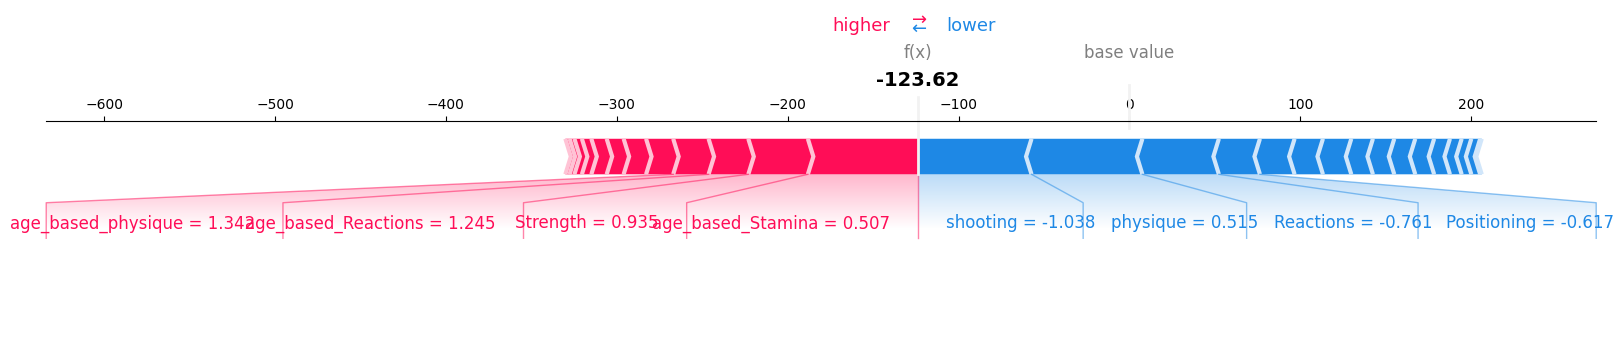

                             (256658, J. Ngankam, 2024)       shap
Crossing                                           69.0 -12.660000
Finishing                                          71.0   2.820000
ShortPassing                                       65.0  -5.650000
Volleys                                            53.0   0.000000
Dribbling                                          75.0 -20.280001
Curve                                              48.0 -12.300000
FKAccuracy                                         43.0  -6.860000
LongPassing                                        50.0   0.000000
BallControl                                        70.0   4.360000
SprintSpeed                                        91.0  -0.930000
Agility                                            70.0   0.000000
Reactions                                          67.0 -44.759998
Balance                                            75.0   0.000000
ShotPower                                          75.0   0.00

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


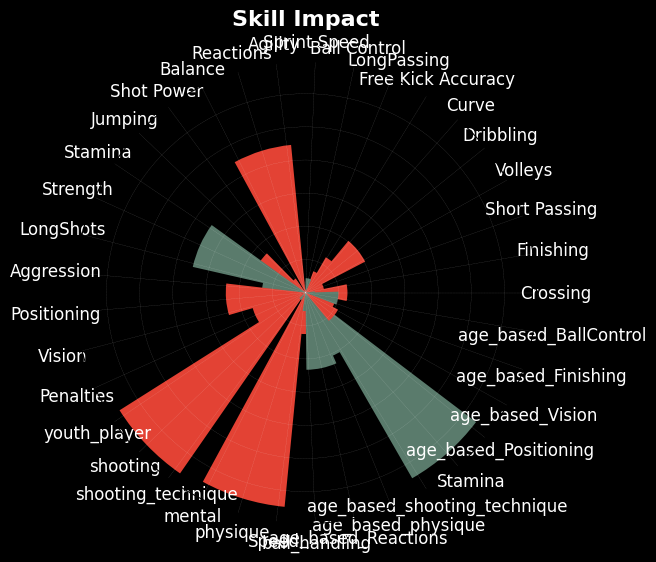

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################


In [12]:
from config import plot_feature_mapping

for ID in [101,266245,240833,251852,256658]:
    player = analyze_individual_ID(ID = ID	,df_raw=df_prospect,attributes=attributes,model = model,scaler=scaler)
    player.rename(index=plot_feature_mapping, inplace=True)
    create_polar_plot(player['shap'], positive_color= "#5a7b6c", negative_color='#e34234')
    
    print("-"*150)
    print("#"*150)

# Data Analysis

In [13]:
sql_prospect = f"""
SELECT * FROM  fifa WHERE Potential>84 and Age < 23  and overall <84
order by potential DESC;
"""

import pandas as pd
import sqlite3
DATABASE_PATH = "data/sport_analytics/database/football.db"
# Step 1: Establish a database connection
conn = sqlite3.connect(DATABASE_PATH)

df = pd.read_sql_query(sql_prospect, conn)

conn.close()
df = df.set_index(['ID','Name','FIFA'])
df.head()

Age  \
ID     Name          FIFA         
231747 K. Mbappé     2018  18.0   
230621 G. Donnarumma 2018  18.0   
                     2019  19.0   
242444 João Félix    2020  19.0   
                     2021  20.0   

                                                                      Photo  \
ID     Name          FIFA                                                     
231747 K. Mbappé     2018  https://cdn.sofifa.net/players/231/747/18_60.png   
230621 G. Donnarumma 2018  https://cdn.sofifa.net/players/230/621/18_60.png   
                     2019  https://cdn.sofifa.net/players/230/621/19_60.png   
242444 João Félix    2020  https://cdn.sofifa.net/players/242/444/20_60.png   
                     2021  https://cdn.sofifa.net/players/242/444/21_60.png   

                          Nationality                                 Flag  \
ID     Name          FIFA                                                    
231747 K. Mbappé     2018      France  https://cdn.sofifa.net/flags/fr.png   
230621 G. Donnarumma 2018       Italy  https://cdn.sofifa.net/flags/it.png   
                     2019       Italy  https://cdn.sofifa.net/flags/it.png   
242444 João Félix    2020    Portugal  https://cdn.sofifa.net/flags/pt.png   
                     2021    Portugal  https://cdn.sofifa.net/flags/pt.png   

                           Overall  Potential             Club  \
ID     Name          FIFA                                        
231747 K. Mbappé     2018     83.0       94.0           Monaco   
230621 G. Donnarumma 2018     82.0       94.0            Milan   
                     2019     82.0       93.0            Milan   
242444 João Félix    2020     80.0       93.0  Atlético Madrid   
                     2021     81.0       93.0  Atlético Madrid   

                                                              Club Logo  \
ID     Name          FIFA                                                 
231747 K. Mbappé     2018  https://cdn.sofifa.net/meta/team/6789/30.png   
230621 G. Donnarumma 2018   https://cdn.sofifa.net/meta/team/113/30.png   
                     2019   https://cdn.sofifa.net/meta/team/113/30.png   
242444 João Félix    2020  https://cdn.sofifa.net/meta/team/7980/30.png   
                     2021  https://cdn.sofifa.net/meta/team/7980/30.png   

                            Value  Wage  ...  Marking StandingTackle  \
ID     Name          FIFA                ...                           
231747 K. Mbappé     2018  €41.5M  €30K  ...     41.0           44.0   
230621 G. Donnarumma 2018  €28.5M  €30K  ...     12.0           14.0   
                     2019    €29M  €20K  ...     20.0           14.0   
242444 João Félix    2020    €28M  €38K  ...      NaN           42.0   
                     2021  €62.5M  €52K  ...      NaN           42.0   

                           SlidingTackle  GKDiving  GKHandling  GKKicking  \
ID     Name          FIFA                                                   
231747 K. Mbappé     2018           40.0      13.0         5.0        7.0   
230621 G. Donnarumma 2018           16.0      88.0        78.0       72.0   
                     2019           16.0      88.0        78.0       72.0   
242444 João Félix    2020           35.0      13.0        12.0       14.0   
                     2021           35.0      13.0        12.0       14.0   

                           GKPositioning  GKReflexes  Composure  \
ID     Name          FIFA                                         
231747 K. Mbappé     2018           11.0         6.0       80.0   
230621 G. Donnarumma 2018           78.0        88.0       68.0   
                     2019           78.0        88.0       68.0   
242444 João Félix    2020           13.0        14.0       82.0   
                     2021           13.0        14.0       82.0   

                           Defensive awareness  
ID     Name          FIFA                       
231747 K. Mbappé     2018                  NaN  
230621 G. Donnarumma 2018     

In [14]:
features = list(set(model.feature_names_in_).intersection(df.columns))

In [15]:
model.feature_names_in_

array(['Crossing', 'Finishing', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Positioning',
       'Vision', 'Penalties', 'youth_player', 'shooting',
       'shooting_technique', 'mental', 'physique', 'Speed',
       'ball_handling', 'age_based_Reactions', 'age_based_physique',
       'age_based_shooting_technique', 'age_based_Stamina',
       'age_based_Positioning', 'age_based_Vision', 'age_based_Finishing',
       'age_based_BallControl'], dtype='<U28')

In [16]:
df[df.index.get_level_values('ID')==240833][features]

Crossing  FKAccuracy  Positioning  Reactions  \
ID     Name       FIFA                                                 
240833 Y. Moukoko 2023      44.0        39.0         67.0       62.0   
                  2024      47.0        42.0         78.0       77.0   

                        Aggression  Stamina  Dribbling  Agility  Volleys  \
ID     Name       FIFA                                                     
240833 Y. Moukoko 2023        43.0     64.0       78.0     84.0     69.0   
                  2024        52.0     68.0       79.0     85.0     77.0   

                        SprintSpeed  ...  Jumping  Penalties  Finishing  \
ID     Name       FIFA               ...                                  
240833 Y. Moukoko 2023         86.0  ...     71.0       60.0       75.0   
                  2024         79.0  ...     79.0       60.0       79.0   

                        Vision  LongShots  LongPassing  BallControl  \
ID     Name       FIFA                                                
240833 Y. Moukoko 2023    59.0       59.0         39.0         75.0   
                  2024    59.0       67.0         48.0         81.0   

                        ShotPower  Curve  ShortPassing  
ID     Name       FIFA                                  
240833 Y. Moukoko 2023       65.0   68.0          64.0  
                  2024       78.0   68.0          71.0  

[2 rows x 22 columns]